## CSE ML, ML 06, Lab 04 Assignment
### Simple linear regression
Lakshmi Vallala
AP18110010416
CSE-G(07)

#### Problem 1. Implement Linear Regression and calculate sum of residual error on the following Datasets.
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

> Compute the regression coefficients using analytic formulation and calculate Sum
Squared Error (SSE) and R2 value.

> Implement gradient descent (both Full-batch and Stochastic with stopping
criteria) on Least Mean Square loss formulation to compute the coefficients of
regression matrix and compare the results using performance measures such as R2
SSE etc.

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn import model_selection 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [8]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]

In [9]:
mx=np.mean(x)
my=np.mean(y)
print(mx,",",my)

4.5 , 6.5


In [10]:
s1=0
s2=0
for i in range(10):
    x1=x[i]*(y[i]-my)
    s1=s1+x1
for i in range(10):
    y1=x[i]*(x[i]-mx)
    s2=s2+y1
b1=s1/s2
b0=my-(b1*mx)

In [12]:
print("Regression Coefficients:-")
print("B0 =",b0)
y1=0
x1=0
print("B1 =",b1)

Regression Coefficients:-
B0 = 1.2363636363636363
B1 = 1.1696969696969697


In [14]:
s1=0
for i in range(10):
    x2=0
    x2=y[i]-(b0+(b1*x[i]))
    x2=x2*x2
    s1=s1+x2
print("Sum square error or SSE=",s1)

Sum square error or SSE= 5.624242424242421


In [15]:
#R square
s1=0
s2=0
for i in range(10):
    x1=0
    x1=(b0+(b1*x[i])-my)
    x1=x1*x1
    s1=s1+x1
#sst
for i in range(10):
    x2=0
    x2=y[i]-my
    x2=x2*x2
    s2=s2+x2
r=s1/s2
print("R square error=",r)

R square= 0.9525380386139879


In [16]:
# Gradient Descent
bb0=0
bb1=0
a=0.001
n=np.size(x)
y_exp=np.zeros(n)
for j in range(10000):
    for i in range(n):
        y_exp[i]=b0+b1*x[i]
        bb0=bb0+a*(y[i]-y_exp[i])*1
        bb1=bb1+a*(y[i]-y_exp[i])*x[i]
print("B0=",bb0)
print("B1=",bb1)

B0= 1.3010426069826053e-14
B1= 6.938937271994128e-14


In [17]:
# Stochastic
bb0=0
bb1=0
a=0.001
n=np.size(x)
y_exp=np.zeros(n)
b=[0,0]
se=10
while(se>1):
    for i in range(n):
        y_exp[i]=b0+b1*x[i]
        bb0=bb0+a*(y[i]-y_exp[i])*1
        bb1=bb1+a*(y[i]-y_exp[i])*x[i]
        b[0]=bb0
        b[1]=bb1
    e=y-y_exp
    se=np.sum((e**2))*(1/n)
print("Squared error=",se)
print("B0=",bb0)
print("B1=",bb1)

Squared error= 0.5624242424242424
B0= 1.3010426069826053e-18
B1= 7.37257477290143e-18


******************************************************************
******************************************************************
Result: 
> The regression Coefficients are:- 
B0 = 1.2363636363636363 
B1 = 1.1696969696969697 

> SSE= 5.624242424242421 

> R square= 0.9525380386139879

> Gradient Descent B0= 1.3010426069826053e-14 B1= 
6.938937271994128e-14

> Stochastic squared error= 0.5624242424242424 B0= 1.3010426069826053e-18 B1= 7.37257477290143e-18 

> The value of B0 value estimation is approximately same in the methods we used. However, B1 values show a drastic change in its value while using different methods.
******************************************************************
******************************************************************

#### PROBLEM 2

Download Boston Housing Rate Dataset. Analyse the input attributes and find out the attribute that best follow the linear relationship with the output price. Implement both the analytic formulation and gradient descent (Full-batch, stochastic) on LMS loss formulation to compute the coefficients of regression matrix and compare the results.

In [24]:
data = load_boston()
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [26]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
boston = pd.DataFrame(data.data)
boston.columns = data.feature_names
boston.shape
boston['Price'] = data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
X = boston.drop('Price', axis = 1) #Inputs
Y = boston['Price'] #Output

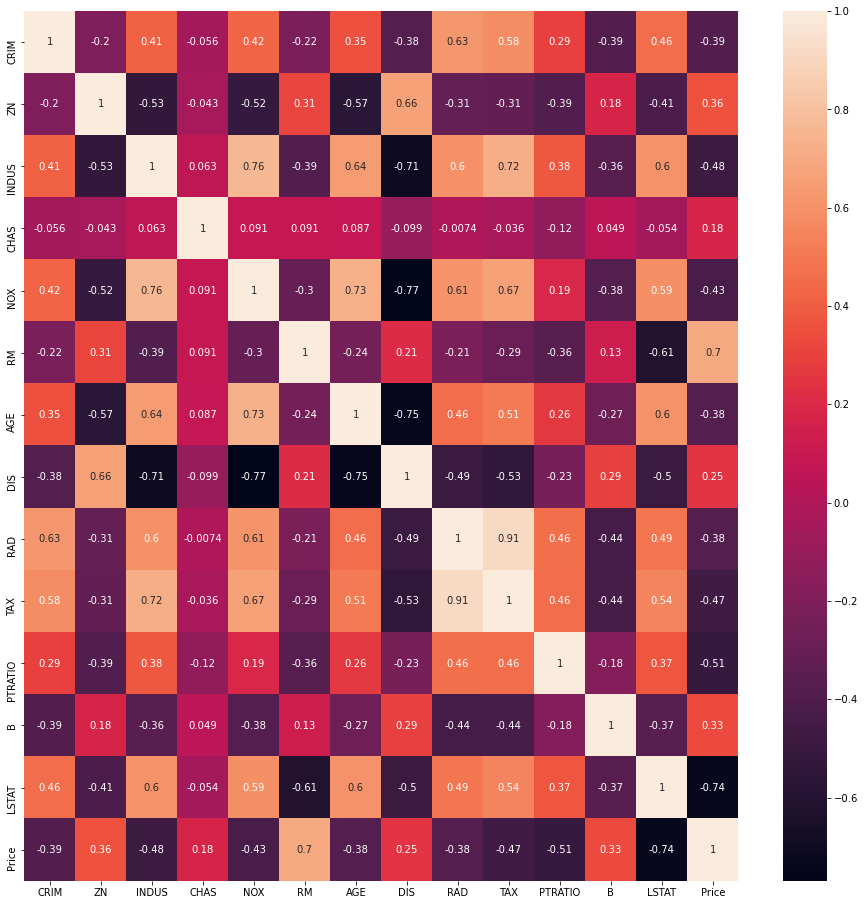

In [33]:
fig = plt.figure(figsize = (16,16))
fig.add_subplot(1,1,1)
sns.heatmap(boston.corr(), annot = True) #annot = True, to print the values of the Correl
plt.show()

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


In [37]:
X_train.mean()

CRIM         3.345161
ZN          12.316832
INDUS       11.020396
CHAS         0.066007
NOX          0.552900
RM           6.344677
AGE         67.994389
DIS          3.851676
RAD          9.330033
TAX        403.603960
PTRATIO     18.241254
B          357.580330
LSTAT       12.284356
dtype: float64

In [38]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [39]:
X_train

array([[-0.41578295,  0.87352395, -1.26776279, ...,  0.07059108,
         0.4013224 , -0.76478938],
       [-0.418265  ,  0.53565542, -0.88343563, ...,  0.33739895,
         0.36752652, -0.68194509],
       [-0.40197749,  0.40895473, -0.74002998, ...,  0.38186693,
         0.19043166, -0.39484679],
       ...,
       [-0.42085574,  2.85850154, -1.29214175, ..., -0.55196061,
         0.37086164, -0.89905426],
       [ 0.9876692 , -0.52018372,  1.01525525, ...,  0.87101469,
        -2.75403431,  1.56913414],
       [-0.39384258, -0.52018372, -0.35283471, ...,  1.18229053,
        -3.18815572, -0.23629996]])

Coefficients: 
 [-0.89808951  0.8997035   0.20911038  0.87183835 -1.66596526  2.78626531
 -0.49838339 -3.23280183  2.18074482 -1.66340784 -1.99336417  0.97563519
 -4.03205094]
Mean squared error: 23.79
Coefficient of determination: :  0.6867652953185328
Variance score: 0.69


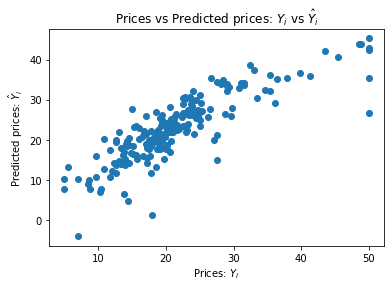

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
print('Coefficients: \n', lm.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
# print("R^2 score: %.2f" % lm.score(X_test, Y_test))
RS = r2_score(Y_test, Y_pred)
print("Coefficient of determination: : ", RS)
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [46]:
#Full batch Gradient Descent
X = data.data
y = np.expand_dims(data.target,axis=1)
def gradient_descent(X, y, eta = 0.000001, n_iter = 1000):
    b0 = 1
    b1 = np.ones((13,1))
    costList = []
    m = len(y)
    for _ in range(n_iter):
        error = (b0 + X.dot(b1)) - y
        b0 += -eta * (error.sum() / m )
        b1 += -eta * (X.T.dot(error) / m )
        costList.append(mean_squared_error(y, (b0 + X.dot(b1))))
    return costList
fgd = gradient_descent(X, y, eta=10e-5,n_iter=10)
print(fgd)

[755573788.0260837, 693767889313.7323, 637018460520621.8, 5.849110716515653e+17, 5.37066008199516e+20, 4.9313461676989507e+23, 4.527967634221435e+26, 4.157585008096008e+29, 3.817499261457698e+32, 3.505232143865173e+35]


In [55]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [-0.77687521  0.66055767 -0.08256296  0.92125553 -1.23903402  2.84247358
 -0.53321465 -2.91456377  1.28569271 -0.80193698 -1.9091092   0.95595946
 -4.01840345]
Y_intercept [23.12220551]


In [51]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

In [56]:
Y_test_pred = regr.predict(X_test)
Y_train_pred = regr.predict(X_train)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-0.89808951  0.8997035   0.20911038  0.87183835 -1.66596526  2.78626531
 -0.49838339 -3.23280183  2.18074482 -1.66340784 -1.99336417  0.97563519
 -4.03205094]


In [57]:
mse = mean_squared_error(Y_test, Y_test_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  23.78816600745192


In [58]:
RS = r2_score(Y_test, Y_test_pred)
print("Coefficient of determination: : ", RS)

Coefficient of determination: :  0.6867652953185328


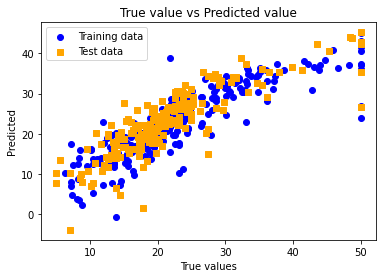

In [59]:
#Visualization of True price and Predicted price
plt.scatter(Y_train ,Y_train_pred,c='blue',marker='o',label='Training data')
plt.scatter(Y_test,Y_test_pred ,c='orange',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plot.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()